In [1]:
!nvidia-smi

Tue Sep 24 16:02:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install -q supervision ultralytics==8.2.98

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 9.5 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
#download weights

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 3.4G
-rw-r--r-- 1 root root 139M Jun 20  2023 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.1
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.1
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.1
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.1
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt.1
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt.1


In [ ]:
!ls -lh {HOME}/weights

total 3.4G
-rw-r--r-- 1 root root 139M Jun 20  2023 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.1
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.1
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.1
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.1
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt.1
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt.1


In [ ]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q -O {HOME}/data/a.jpg https://ggsc.s3.us-west-2.amazonaws.com/assets/images/Who_Is_the_Most_Curious_-1x_-_abcdef_-_08f07a61a473141bce046cf48e43d811ee415fe9.jpg
!ls -lh {HOME}/data

total 16K
-rw-r--r-- 1 root root 15K Sep 18 18:37 a.jpg


/content


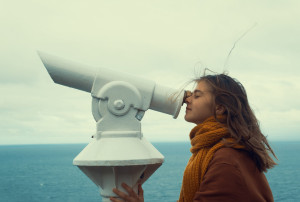

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/data/a.jpg', height=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/a.jpg

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultra

/content


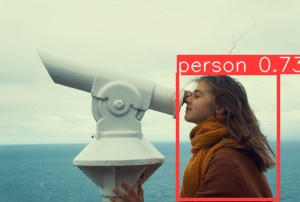

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'runs/detect/predict/a.jpg', height=600)

In [5]:
from ultralytics import YOLO


In [ ]:
model = YOLO(f'{HOME}/weights/yolov10n.pt')


In [ ]:
results = model(source=f'{HOME}/data/a.jpg', conf=0.25)


image 1/1 /content/data/a.jpg: 448x640 1 sheep, 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 26.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
!pip install supervision


0: 448x640 1 person, 447.7ms
Speed: 5.6ms preprocess, 447.7ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


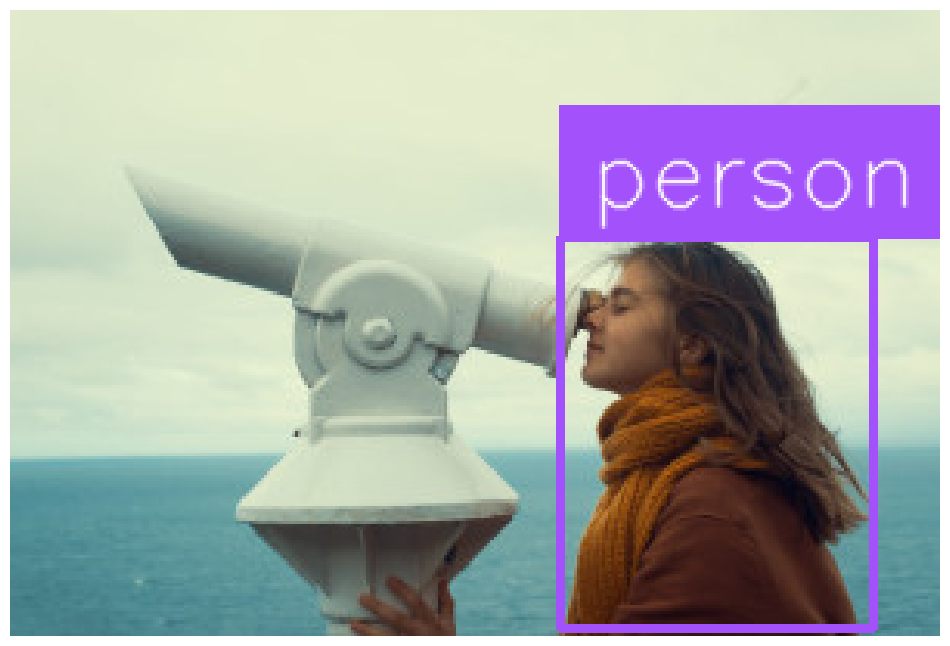

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/a.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator(text_scale=1)

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [ ]:
# download and train

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.8 MB/s eta 0:00:00


In [7]:
rf = Roboflow(api_key="jEjS3SreYyTGvlqNdyCN")
project = rf.workspace("roboflow-100").project("printed-circuit-board")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to printed-circuit-board-4 in yolov8:: 100%|██████████| 1356/1356 [00:01<00:00, 1005.90it/s]


In [8]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [9]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [11]:
%cd {HOME}

!yolo task=detect mode=train epochs=20 batch=16 plots=True \
model={HOME}/best.pt \
data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New h

/content


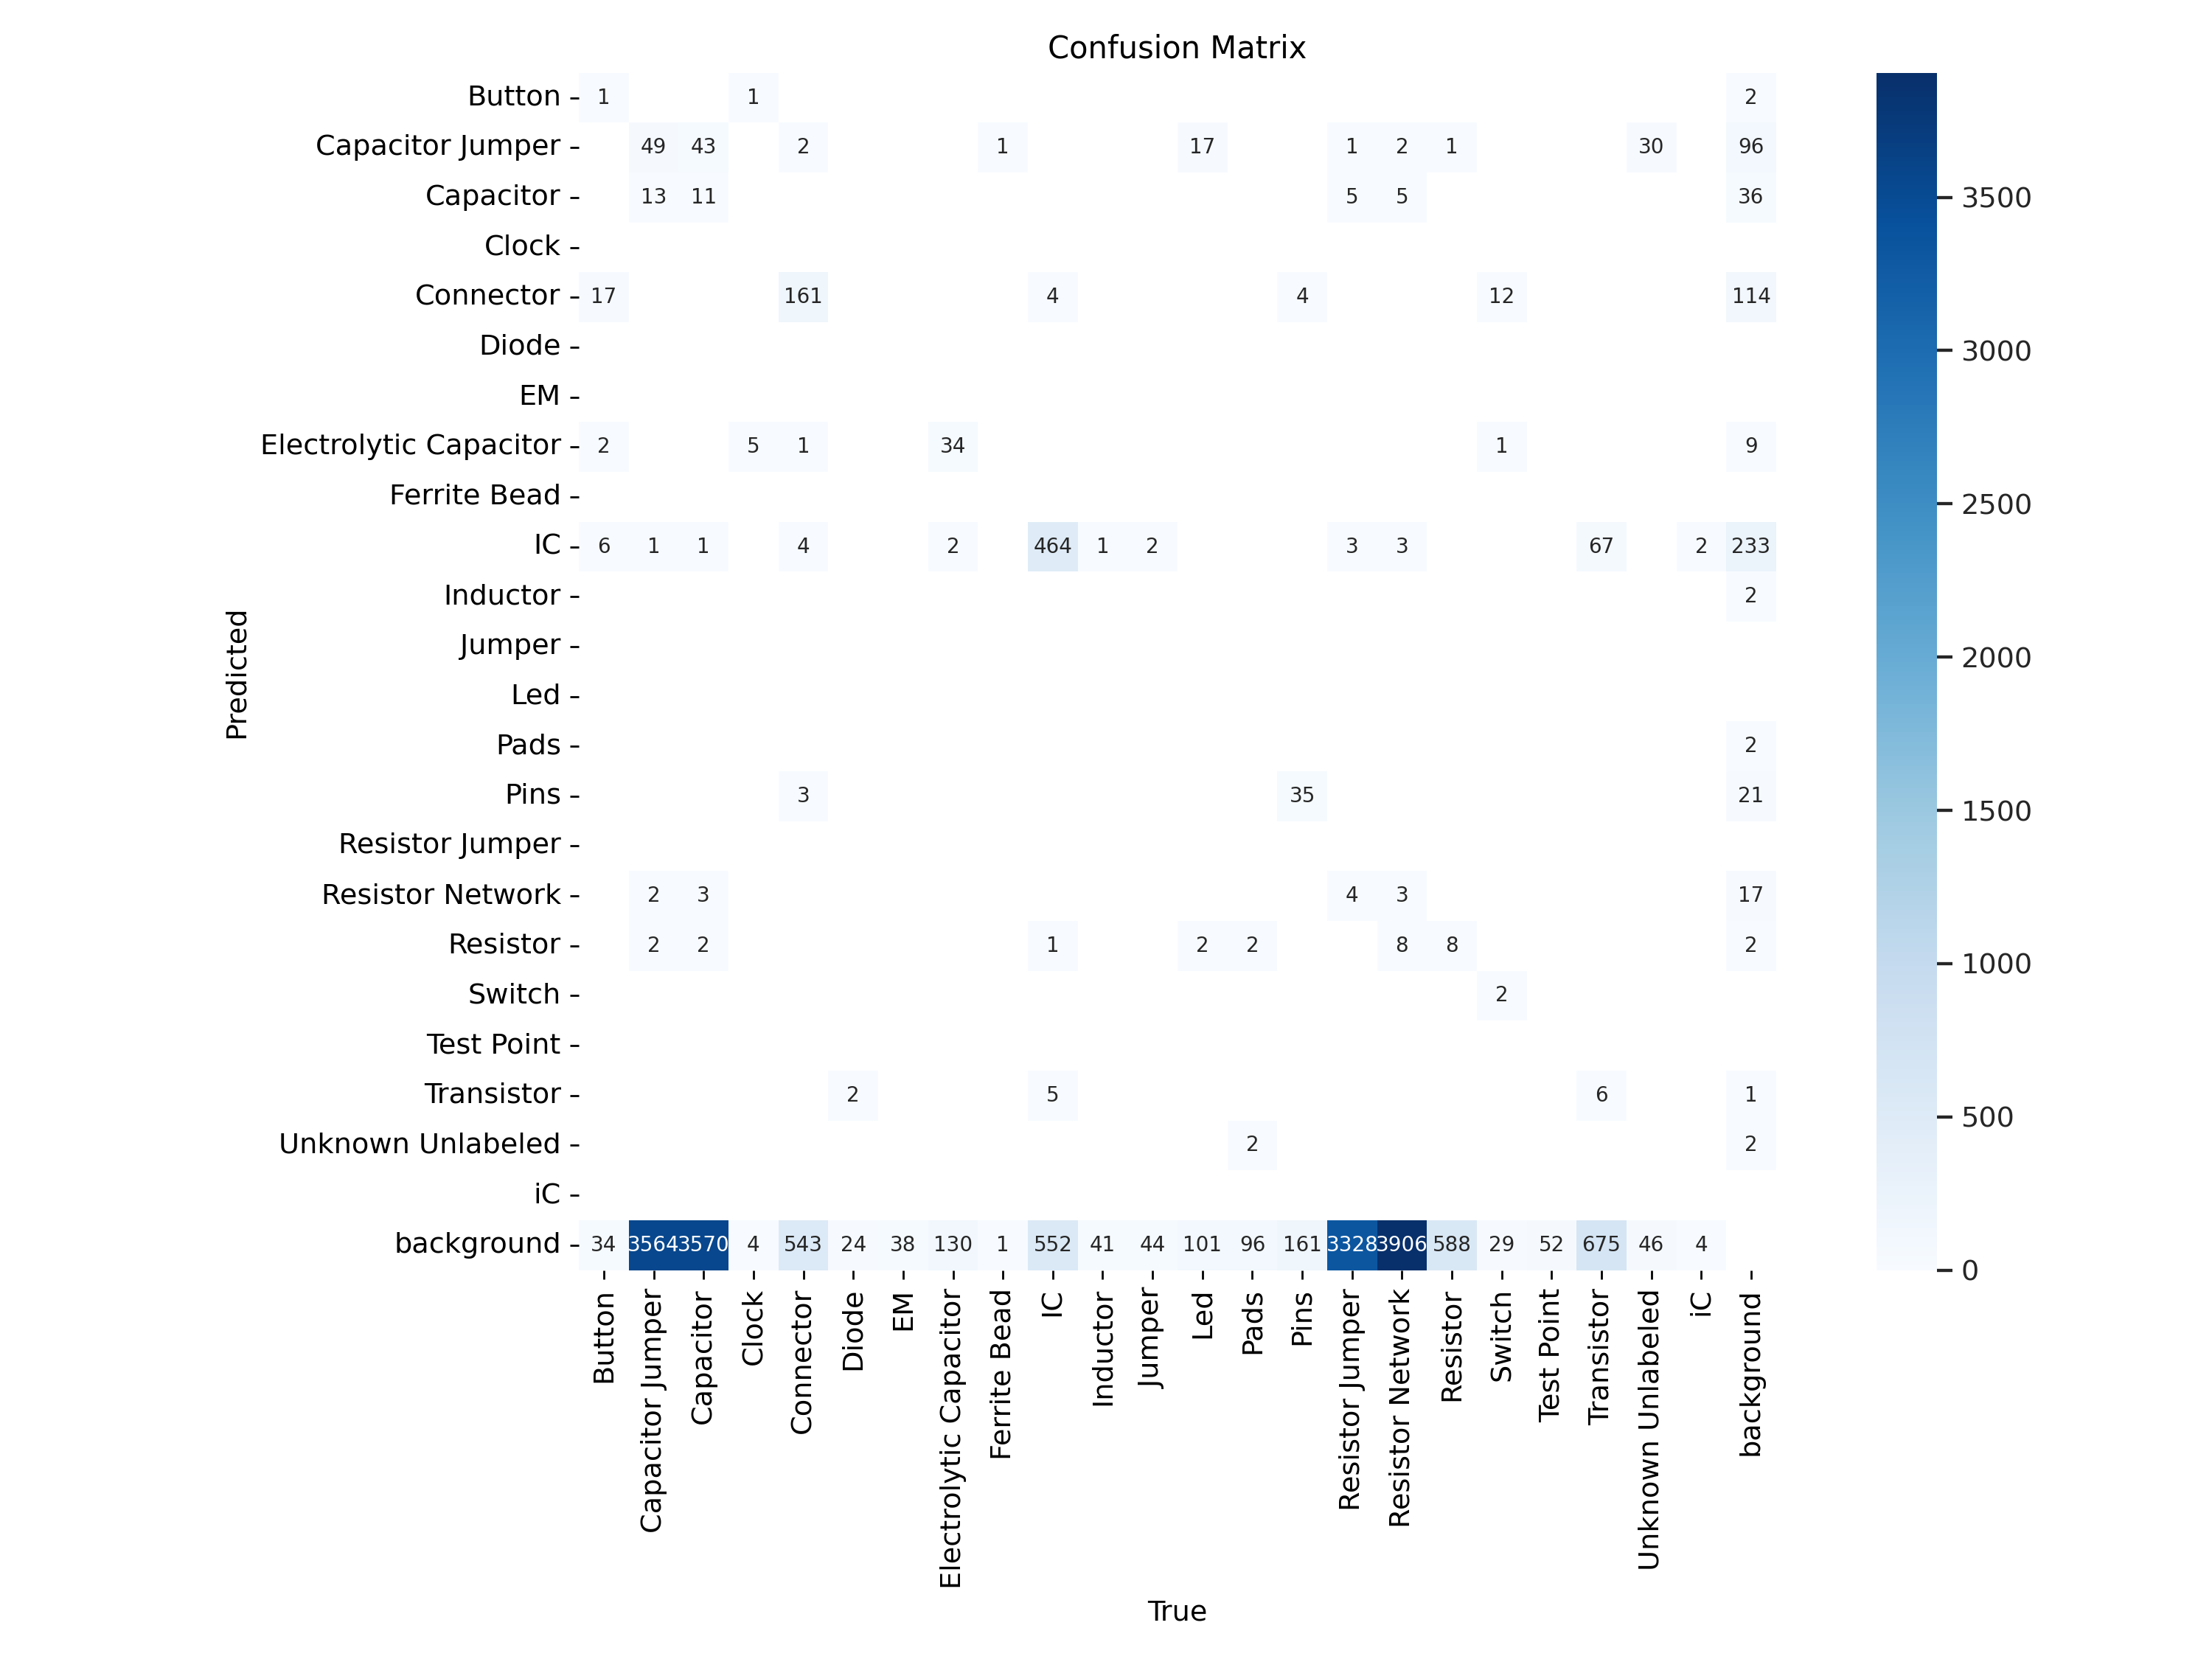

In [13]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [11]:
%cd {HOME}

!ls

/content
best.pt  datasets  sample_data


In [76]:
from ultralytics import YOLOv10
import supervision as sv
model = YOLOv10(f'best.pt')

datasett = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator(
      color = sv.ColorPalette.from_matplotlib('spring',5),
     thickness=15,


)


In [77]:
import random
import cv2
import numpy as np

random_imagep = random.choice(list(datasett.images.keys()))
random_image = datasett.images[random_imagep]

results = model(source=random_image, conf=0.05)[0]
detections = sv.Detections.from_ultralytics(results)


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 480x640 1 Button, 18 Capacitor Jumpers, 9 Capacitors, 31 Connectors, 5 Electrolytic Capacitors, 16 ICs, 1 Pads, 1 Pins, 3 Resistors, 1 Switch, 1 Test Point, 3 Transistors, 202.4ms
Speed: 7.4ms preprocess, 202.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


In [78]:
detect_annotator = bounding_box_annotator

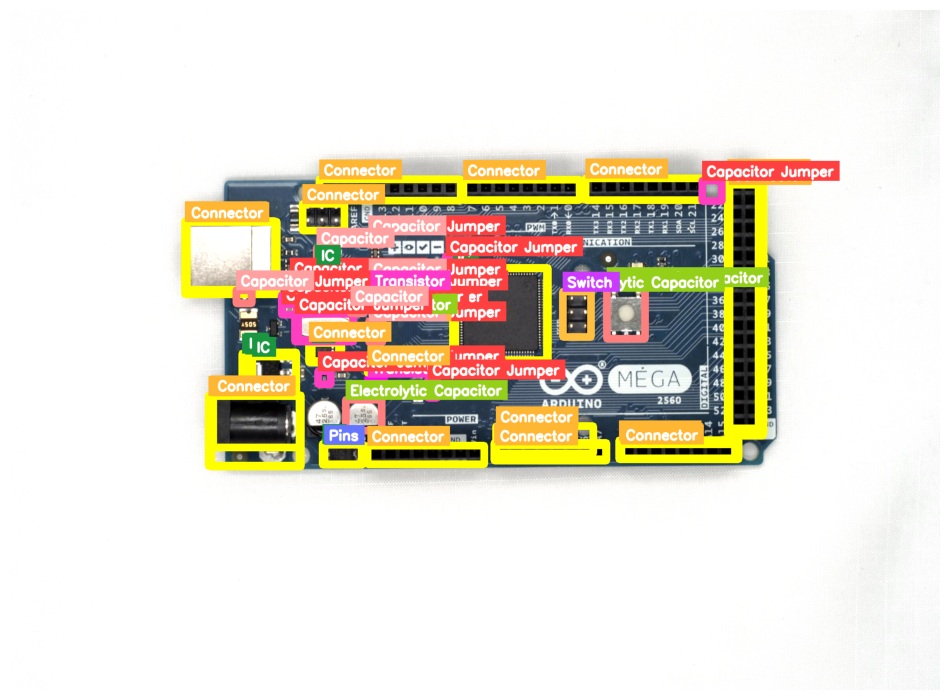

In [82]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2HSV)

# Decrease the saturation by multiplying the saturation channel (S)
saturation_factor = 0.7  # Set between 0 (no saturation) and 1 (full saturation)
hsv_image[:, :, 1] = hsv_image[:, :, 1] * saturation_factor  # Modify the saturation channel

# Convert back to the BGR color space
desaturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Decrease contrast by blending the image with a gray image
alpha = 1.35  # Contrast factor, <1.0 reduces contrast
gray_image = np.full_like(desaturated_image, 128)  # Create a gray image
low_contrast_image = cv2.addWeighted(desaturated_image, alpha, gray_image, 1 - alpha, 0)

# Annotate the image with the detection results
label_annotator = sv.LabelAnnotator(text_scale=1, text_thickness=3)
annotated_image = detect_annotator.annotate(
    scene=low_contrast_image, detections=detections)

annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Display the final annotated image
sv.plot_image(annotated_image)


In [83]:
with sv.ImageSink(target_dir_path='{HOME}') as sink:
    sink.save_image(image=annotated_image)

In [ ]:
random_imagep
%cd {HOME}

/content


In [20]:
random_imagep
#/content/datasets/printed-circuit-board-4/valid/images/pcb54rec1_jpg.rf.7d03447844bfbfccba26f27a7aa01f08.jpg
#/content/datasets/printed-circuit-board-4/valid/images/Zedboard_jpg.rf.754d7171a5bd6dac48094964405577a9.jpg
#/content/datasets/printed-circuit-board-4/valid/images/pcb122rec1_jpg.rf.2ec1903d3c3db22f624db9deb9b6f989.jpg
#/content/datasets/printed-circuit-board-4/valid/images/ML450_Top1_jpg.rf.bef6c9be83bf84e757c7829ead905565.jpg

'/content/datasets/printed-circuit-board-4/valid/images/ML450_Top1_jpg.rf.bef6c9be83bf84e757c7829ead905565.jpg'

In [84]:
import os
import matplotlib.pyplot as plt
import cv2

# Ensure the 'detections' folder exists, create it if not
os.makedirs('detections', exist_ok=True)

# Get the original image
image = cv2.imread(random_imagep)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for display in matplotlib

comps=[]
# Loop over all the detections
for i, box in enumerate(results.boxes):
    padding = 5  # Define padding size
    x1, y1, x2, y2 = map(int, [max(0, box.xyxy[0][0] - padding),
                              max(0, box.xyxy[0][1] - padding),
                              min(image.shape[1], box.xyxy[0][2] + padding),
                              min(image.shape[0], box.xyxy[0][3] + padding)])
    class_id = int(box.cls[0])  # Get the class label (assumed to be in box.cls)
    confidence = box.conf[0]    # Get the confidence score for the detection

    # Crop the detected object from the image
    cropped_image = image[y1:y2, x1:x2]
    comps.append(cropped_image)
    # # Save each cropped detection image to the 'detections' folder
    # save_path = f'detections/detection_{i + 1}.png'
    # plt.figure(figsize=(5, 5))
    # plt.imshow(cropped_image)
    # plt.axis('off')

    # # Save the figure
    # plt.savefig(save_path, bbox_inches='tight', pad_inches=0)



In [85]:
len(comps)

90

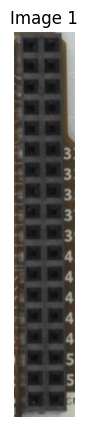

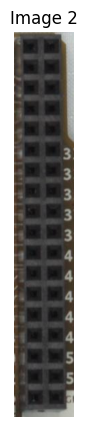

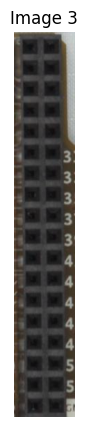

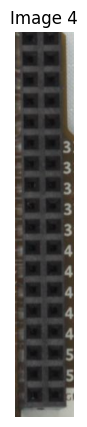

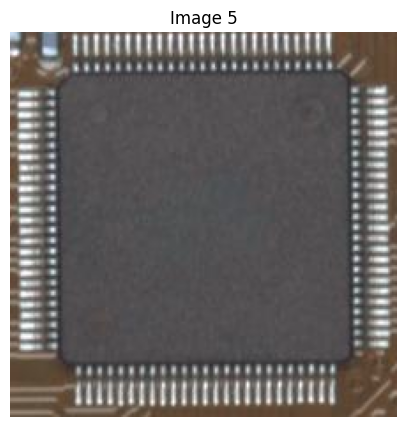

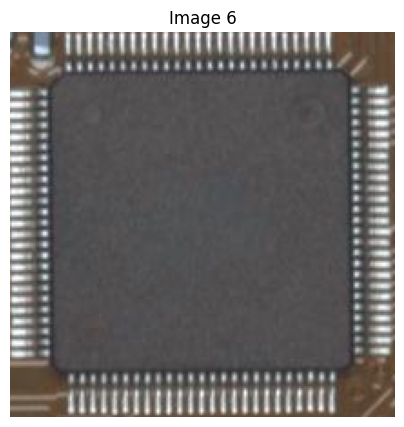

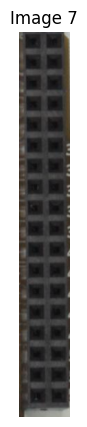

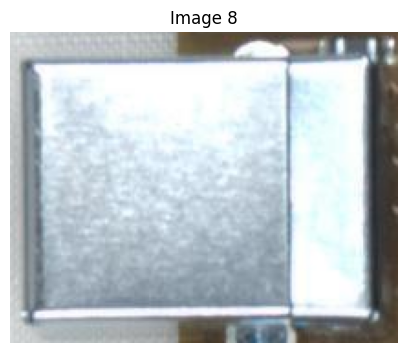

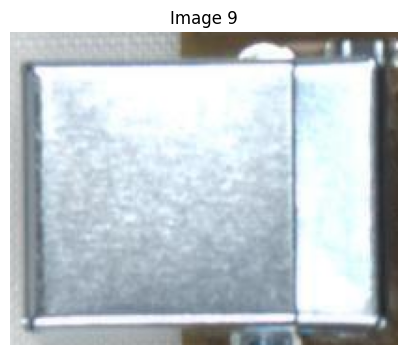

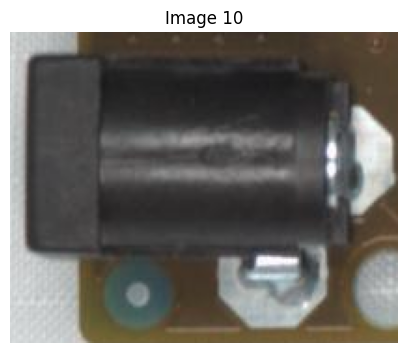

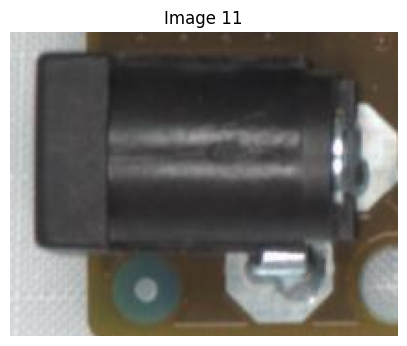

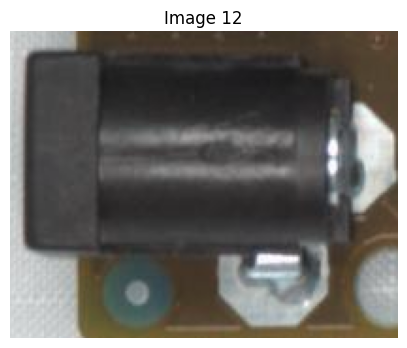

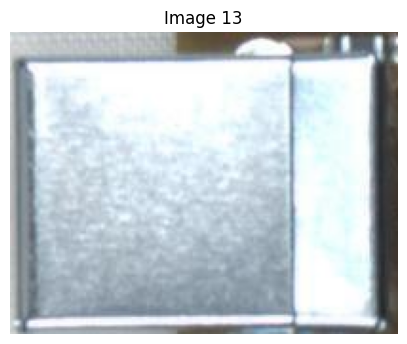

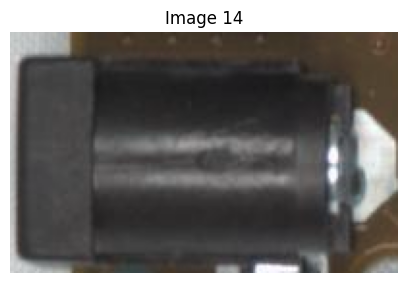

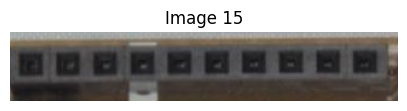

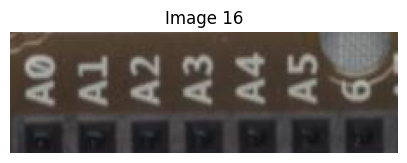

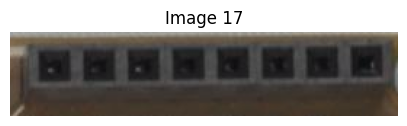

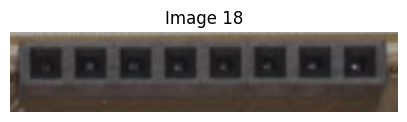

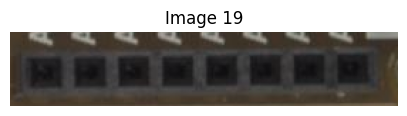

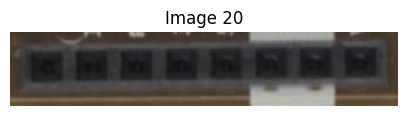

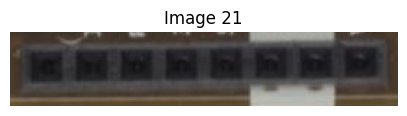

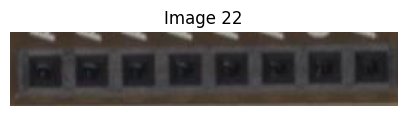

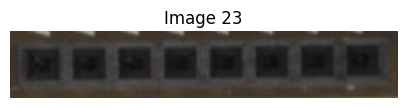

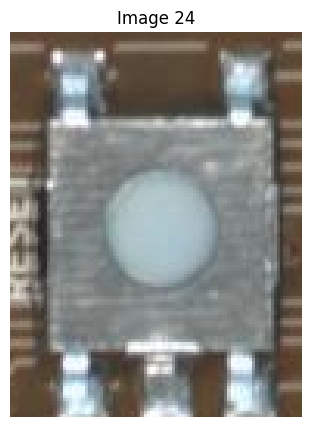

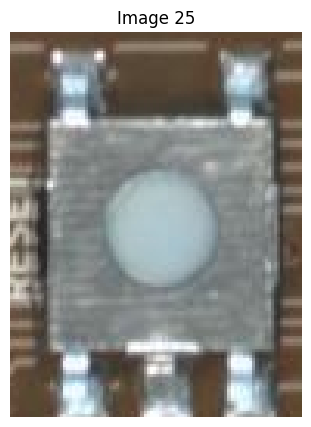

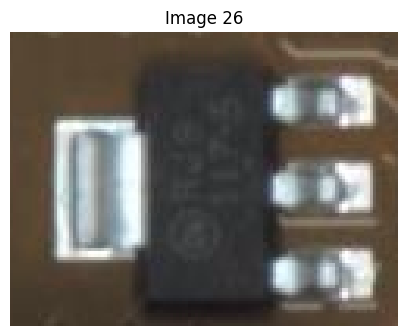

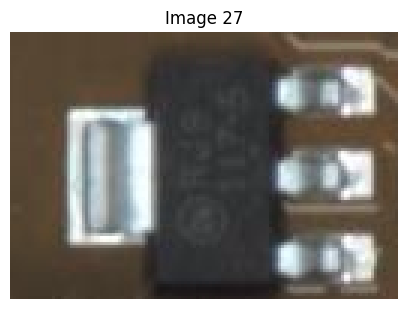

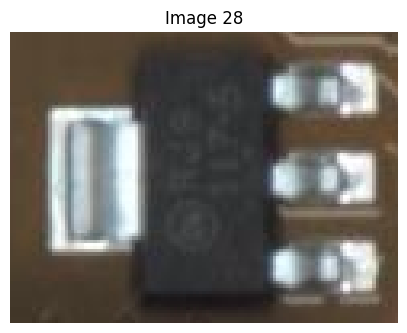

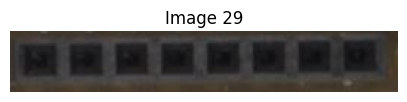

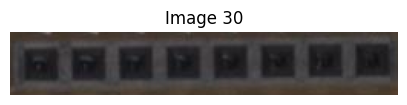

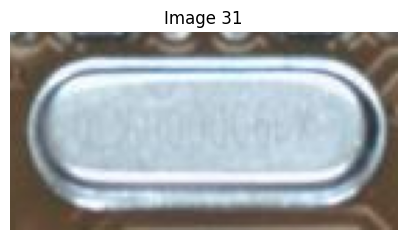

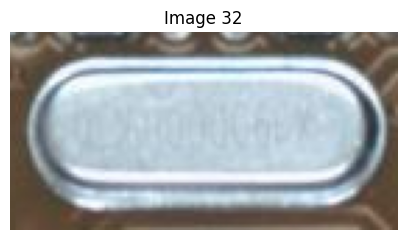

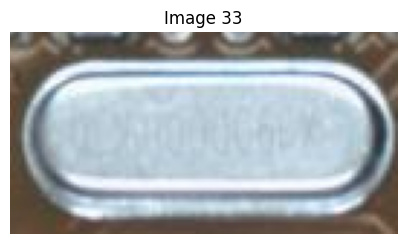

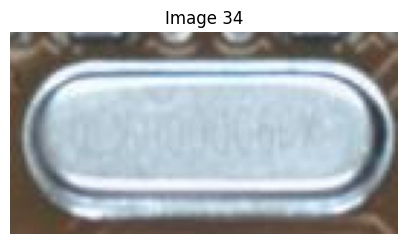

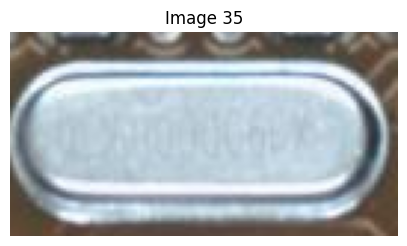

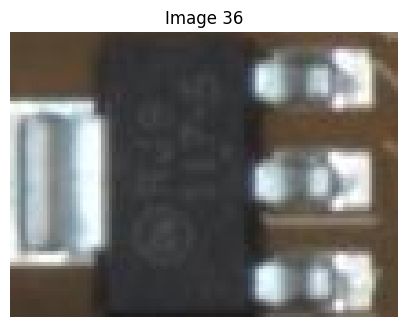

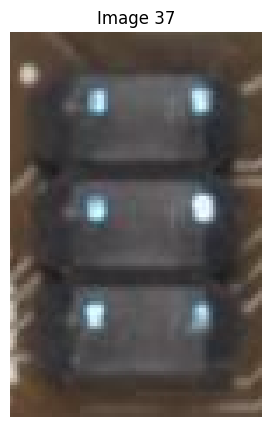

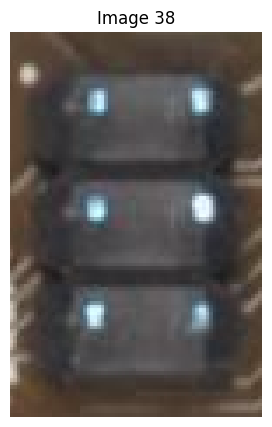

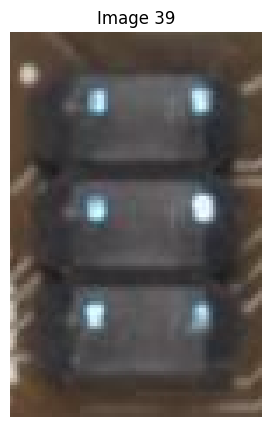

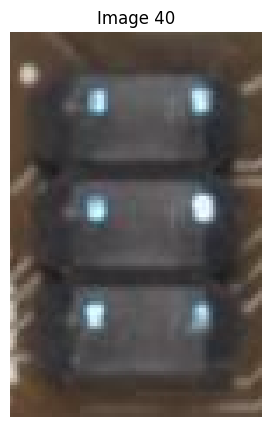

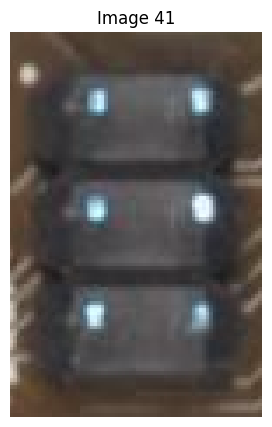

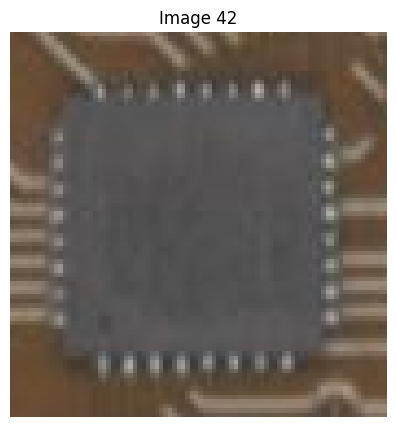

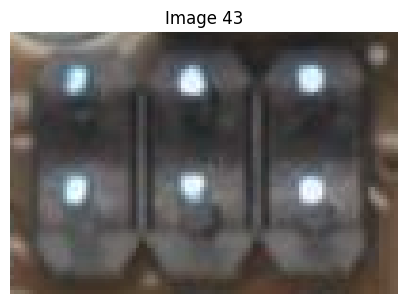

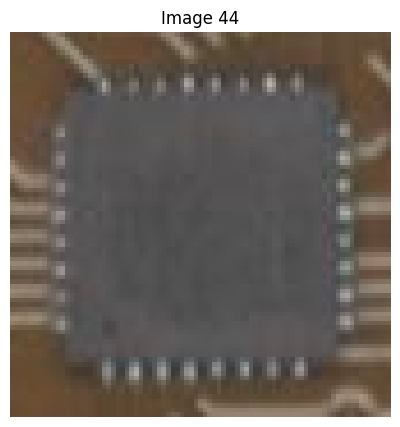

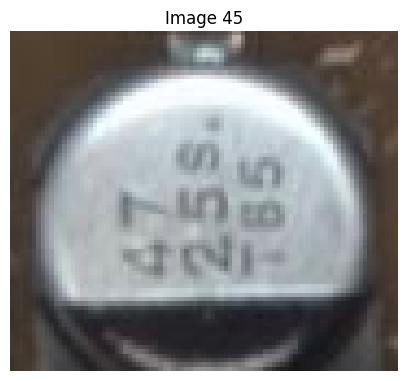

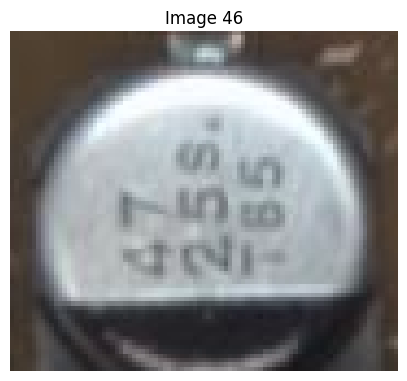

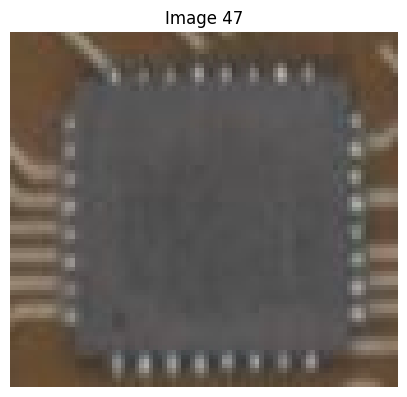

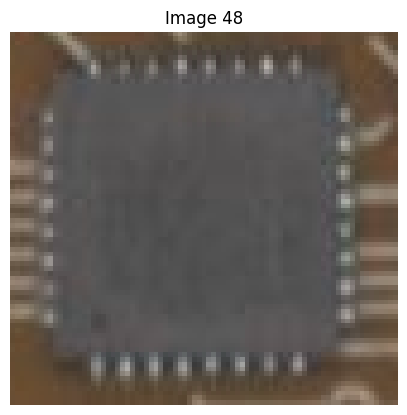

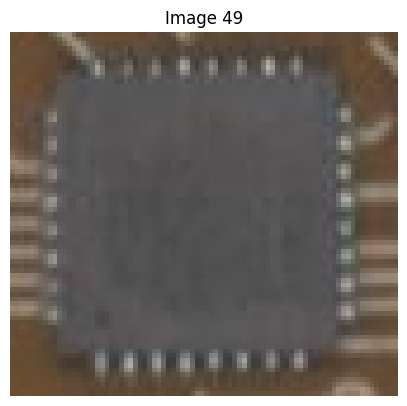

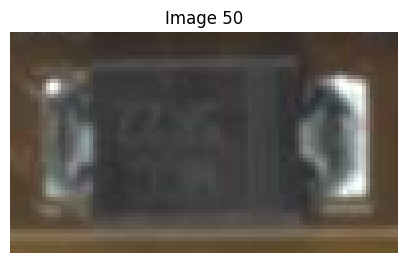

In [86]:
import matplotlib.pyplot as plt

# Sort the images by size (height × width) in ascending order and select the top 5
largest_images = sorted(comps, key=lambda img: img.shape[0] * img.shape[1], reverse=True)[:50]

# Plot each of the top 5 largest images
for i, k in enumerate(largest_images):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(k, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct color display
    plt.title(f"Image {i+1}")
    plt.axis('off')  # Turn off axis labels
    plt.show()


In [97]:
  from ultralytics import FastSAM
from ultralytics import SAM

smodel = FastSAM('FastSAM-x.pt')

# smodel = SAM("mobile_sam.pt")


0: 512x448 7 objects, 2320.8ms
Speed: 1.3ms preprocess, 2320.8ms inference, 6.4ms postprocess per image at shape (1, 3, 512, 448)


array([[[ 91,  83,  57],
        [ 79,  78,  53],
        [ 68,  75,  48],
        ...,
        [ 40,  45,  47],
        [ 40,  45,  47],
        [ 39,  44,  47]],

       [[ 89,  84,  60],
        [ 79,  79,  55],
        [ 66,  75,  50],
        ...,
        [ 41,  46,  48],
        [ 40,  46,  48],
        [ 37,  41,  46]],

       [[ 85,  85,  62],
        [ 79,  82,  60],
        [ 63,  76,  52],
        ...,
        [ 39,  45,  47],
        [ 38,  46,  47],
        [ 33,  41,  44]],

       ...,

       [[111, 135, 111],
        [128, 153, 128],
        [133, 156, 132],
        ...,
        [152, 157, 127],
        [171, 170, 139],
        [196, 186, 154]],

       [[ 96, 120,  94],
        [114, 137, 111],
        [129, 150, 125],
        ...,
        [178, 173, 138],
        [198, 189, 153],
        [222, 202, 162]],

       [[ 88, 106,  79],
        [ 98, 116,  93],
        [117, 132, 110],
        ...,
        [190, 178, 137],
        [211, 193, 151],
        [225, 201, 156]]], dtype=uint8)
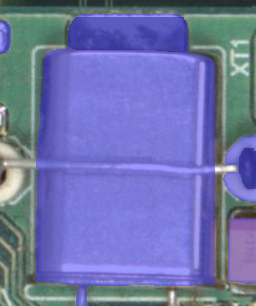

In [98]:
# Run inference on an image
everything_results = smodel(largest_images[-1], device="cpu", retina_masks=True, imgsz=512, conf=0.54, iou=0.73)
img = everything_results[0].plot(labels=True,boxes=False,kpt_line=True)
img

In [118]:
type(img)

numpy.ndarray


0: 512x448 23 objects, 2334.2ms
Speed: 1.9ms preprocess, 2334.2ms inference, 29.3ms postprocess per image at shape (1, 3, 512, 448)


array([[[ 54,  53, 150],
        [ 49,  48, 141],
        [ 46,  47, 139],
        ...,
        [ 33,  33, 133],
        [ 33,  33, 133],
        [ 35,  37, 137]],

       [[ 54,  54, 150],
        [ 49,  48, 141],
        [ 46,  47, 140],
        ...,
        [ 33,  33, 133],
        [ 33,  33, 133],
        [ 35,  36, 137]],

       [[ 53,  53, 151],
        [ 48,  48, 142],
        [ 45,  47, 141],
        ...,
        [ 32,  33, 133],
        [ 32,  33, 133],
        [ 33,  34, 134]],

       ...,

       [[ 56,  58, 155],
        [ 57,  63, 156],
        [ 60,  65, 159],
        ...,
        [102, 105, 190],
        [113, 112, 196],
        [123, 118, 202]],

       [[ 55,  57, 154],
        [ 54,  59, 152],
        [ 58,  63, 156],
        ...,
        [116, 114, 196],
        [127, 122, 204],
        [137, 128, 208]],

       [[ 54,  55, 152],
        [ 51,  56, 148],
        [ 54,  59, 152],
        ...,
        [122, 116, 195],
        [132, 123, 203],
        [139, 127, 205]]], dtype=uint8)
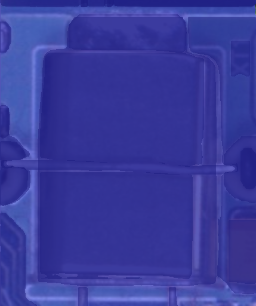

In [99]:
# Run inference on an image
everything_results2 = smodel(largest_images[-1], device="cpu", retina_masks=False, imgsz=512, conf=0.14, iou=0.68)
img2 = everything_results2[0].plot(labels=True,boxes=False,kpt_line=True)
img2

In [ ]:
# help(everything_results[0].plot)

In [95]:
def masks_to_bool(masks):
    if type(masks) == np.ndarray:
        return masks.astype(bool)
    return masks.cpu().numpy().astype(bool)

import numpy as np
def annotate_image(image,base, masks: np.ndarray) -> np.ndarray:
    image = image.copy()

    xyxy = sv.mask_to_xyxy(masks=masks)

    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(opacity=1,color_lookup = sv.ColorLookup.INDEX)

    return mask_annotator.annotate(scene=base, detections=detections)

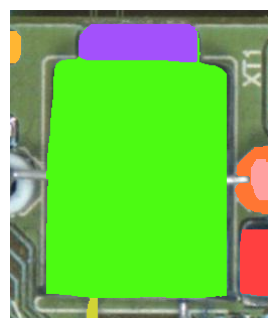

In [105]:
masks = masks_to_bool(everything_results[0].masks.data.numpy())
annotated_image1=annotate_image(image=img2,base=largest_images[-1], masks=masks)
sv.plot_image(image=annotated_image1, size=(4, 4))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 370 but corresponding boolean dimension is 512

In [110]:
type(annotated_image2)

numpy.ndarray

IoU: 1.0000
Dice Coefficient: 0.0090


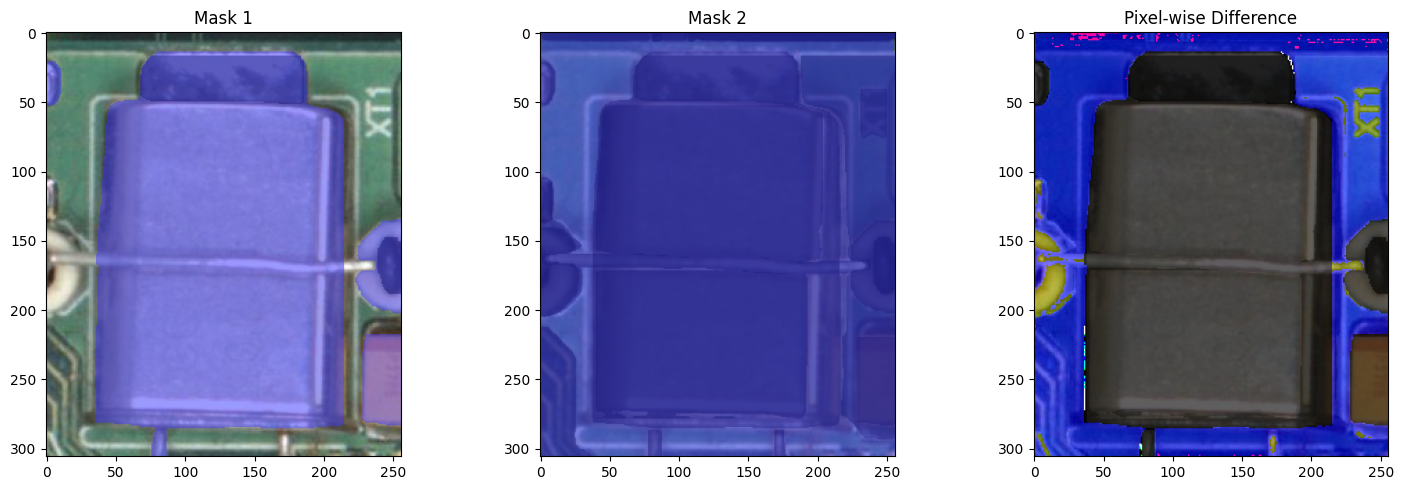

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Sample segmentation masks (binary or multi-class)
mask1 = img # Example mask 1
mask2 = img2  # Example mask 2

# 1. Pixel-wise difference
pixel_diff = np.abs(mask1 - mask2)

# 2. Intersection over Union (IoU)
intersection = np.logical_and(mask1, mask2).sum()
union = np.logical_or(mask1, mask2).sum()
iou = intersection / union

# 3. Dice Coefficient
dice_coeff = 2 * intersection / (mask1.sum() + mask2.sum())

# Print the IoU and Dice Coefficient
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice_coeff:.4f}")

# Plot the masks and their difference
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original mask 1
axs[0].imshow(mask1, cmap='gray')
axs[0].set_title('Mask 1')

# Original mask 2
axs[1].imshow(mask2, cmap='gray')
axs[1].set_title('Mask 2')

# Pixel-wise difference
axs[2].imshow(pixel_diff, cmap='hot')
axs[2].set_title('Pixel-wise Difference')

# Show the plots
plt.tight_layout()
plt.show()


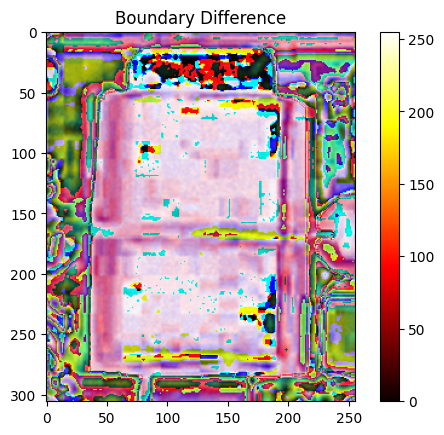

In [107]:
from scipy.ndimage import sobel

# Edge detection (Sobel filter) to detect boundaries
edges_mask1 = sobel(mask1)
edges_mask2 = sobel(mask2)

# Compute the boundary differences
boundary_diff = np.abs(edges_mask1 - edges_mask2)

# Plot boundary differences
plt.imshow(boundary_diff, cmap='hot')
plt.title('Boundary Difference')
plt.colorbar()
plt.show()


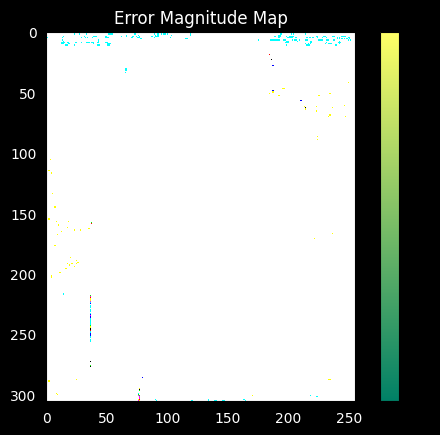

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mask1 and mask2 are already defined and of the same shape

# Compute the magnitude of differences
magnitude_map = np.sqrt((mask1.astype(float) - mask2.astype(float))**2)

# Create a figure with a dark background
plt.figure(facecolor='black')  # Set the figure background color to black

# Display the magnitude map
plt.imshow(magnitude_map, cmap='summer', interpolation='nearest')
plt.title('Error Magnitude Map', color='white')  # Set title color to white
plt.colorbar()  # Add a colorbar

# Set tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.show()


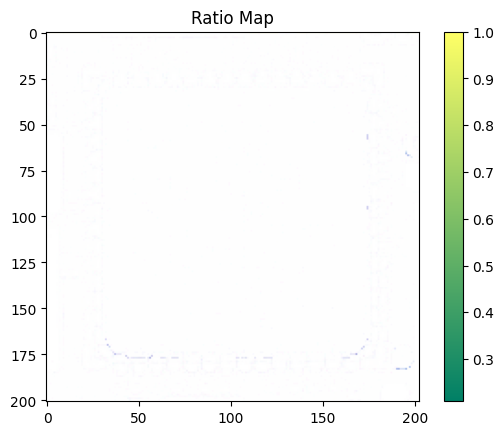

In [179]:
# Ratio map for probabilistic masks
ratio_map = np.divide(mask1.astype(float), (mask2.astype(float) + 1e-6))  # Avoid division by zero

plt.imshow(ratio_map, cmap='summer')
plt.title('Ratio Map')
plt.colorbar()
plt.show()


In [66]:
#ocr

In [27]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 14.1 MB/s eta 0:00:00


In [81]:
import easyocr

# Initialize the EasyOCR reader (you can specify languages if necessary, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

# List to store images with recognizable text
comps_with_text = []

# Loop through all the components in comps and use EasyOCR to detect text
for i, comp in enumerate(comps):
    # Perform OCR on the component image
    ocr_result = reader.readtext(comp)

    # Check if the OCR result contains any text
    if ocr_result:
        # If text is detected, append the image (comp) to the comps_with_text list
        comps_with_text.append((comp,ocr_result))

    if len(comps_with_text)>10:
      break

# Now, comps_with_text contains only the cropped images with recognizable characters
print(f"Found {len(comps_with_text)} images with recognizable text.")


Found 10 images with recognizable text.
Image 1: Detected Text: [([[257, 75], [299, 75], [299, 214], [257, 214]], 'E', 0.09572547831047107)]
Image 2: Detected Text: [([[24, 0], [62, 0], [62, 30], [24, 30]], '5', 0.8748302292356271)]
Image 3: Detected Text: [([[254, 0], [276, 0], [276, 72], [254, 72]], '6', 0.09379143917576105)]
Image 4: Detected Text: [([[280, 46], [305, 46], [305, 120], [280, 120]], '0', 0.09790548172487945)]
Image 5: Detected Text: [([[141, 0], [235, 0], [235, 17], [141, 17]], 'Ot -', 0.01525568775832653)]
Image 6: Detected Text: [([[62, 22], [106, 22], [106, 92], [62, 92]], 'S', 0.041098081424941535), ([[55, 83], [106, 83], [106, 257], [55, 257]], '', 0.0)]
Image 7: Detected Text: [([[101, 0], [251, 0], [251, 19], [101, 19]], 'Vocnv', 0.05854984666507604)]
Image 8: Detected Text: [([[0, 12], [52, 12], [52, 104], [0, 104]], '4', 0.7869503953629788)]
Image 9: Detected Text: [([[133, 0], [253, 0], [253, 37], [133, 37]], 'QLWY', 0.11982778459787369)]
Image 10: Detected 

In [29]:
import easyocr

# Initialize the EasyOCR reader (you can specify languages if necessary, e.g., 'en' for English)
reader = easyocr.Reader(['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [39]:
ocr_result = reader.readtext(largest_images[0])


array([[[65, 52, 78],
        [60, 47, 73],
        [55, 40, 71],
        ...,
        [51, 35, 71],
        [51, 34, 70],
        [51, 34, 68]],

       [[67, 54, 80],
        [63, 50, 76],
        [54, 39, 70],
        ...,
        [65, 49, 85],
        [47, 30, 64],
        [61, 44, 78]],

       [[65, 53, 77],
        [60, 47, 73],
        [52, 37, 66],
        ...,
        [65, 51, 86],
        [59, 44, 77],
        [75, 58, 92]],

       ...,

       [[55, 44, 61],
        [61, 50, 67],
        [62, 51, 68],
        ...,
        [76, 67, 86],
        [69, 57, 79],
        [71, 59, 83]],

       [[52, 39, 57],
        [54, 43, 60],
        [59, 48, 65],
        ...,
        [77, 68, 87],
        [69, 57, 79],
        [71, 59, 83]],

       [[54, 43, 60],
        [52, 41, 58],
        [60, 49, 66],
        ...,
        [68, 59, 76],
        [62, 50, 70],
        [65, 53, 75]]], dtype=uint8)
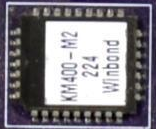

In [71]:
largest_images[37]

array([[[ 66,  61,  81],
        [ 79,  72,  90],
        [ 70,  61,  80],
        ...,
        [ 34,  31,  60],
        [ 32,  29,  58],
        [ 32,  27,  59]],

       [[ 57,  49,  70],
        [ 67,  58,  79],
        [ 63,  51,  73],
        ...,
        [ 36,  32,  59],
        [ 35,  30,  60],
        [ 36,  29,  62]],

       [[ 70,  62,  85],
        [ 67,  57,  81],
        [ 68,  56,  80],
        ...,
        [ 41,  37,  64],
        [ 40,  35,  65],
        [ 41,  34,  67]],

       ...,

       [[131, 121, 122],
        [150, 140, 139],
        [119, 109, 107],
        ...,
        [ 45,  36,  65],
        [ 42,  33,  64],
        [ 41,  32,  63]],

       [[143, 133, 134],
        [154, 144, 143],
        [120, 109, 107],
        ...,
        [ 45,  36,  65],
        [ 44,  35,  66],
        [ 46,  37,  68]],

       [[143, 134, 135],
        [149, 139, 138],
        [112, 102, 101],
        ...,
        [ 46,  37,  66],
        [ 45,  36,  67],
        [ 48,  39,  70]]], dtype=uint8)
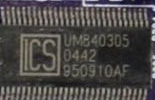

In [74]:
flipped_image = cv2.rotate(largest_images[39], cv2.ROTATE_90_CLOCKWISE)
flipped_image

In [68]:
ocr_result = reader.readtext(flipped_image)

In [69]:
ocr_result

[([[87, 113], [153, 113], [153, 133], [87, 133]],
  'V18235',
  0.4716138528956701),
 ([[54, 126], [190, 126], [190, 152], [54, 152]],
  '0433cE]TAIVAN',
  0.14459798543540442),
 ([[55, 145], [163, 145], [163, 165], [55, 165]],
  '23060J0911 0',
  0.40617901863385314)]

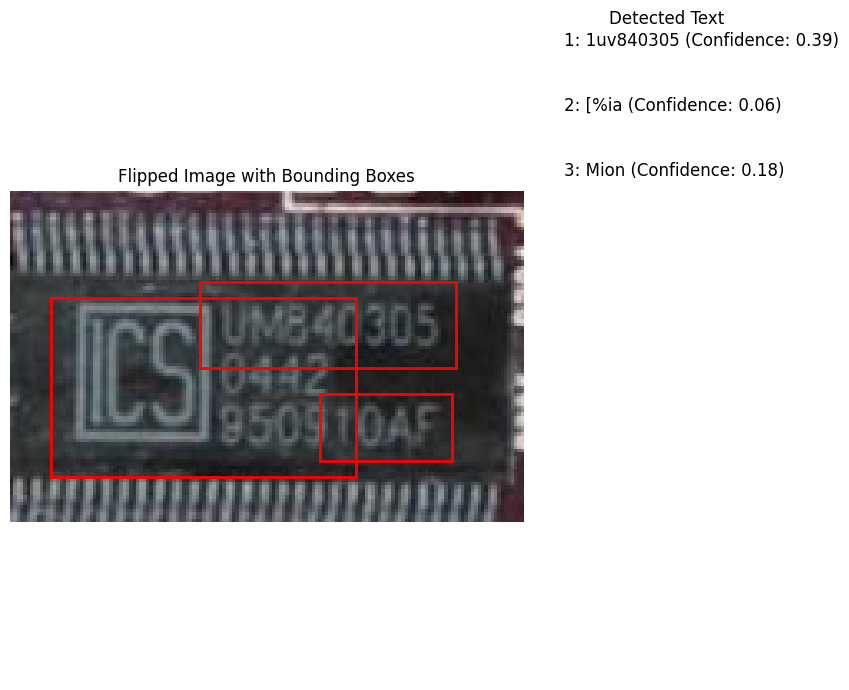

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Perform OCR on the flipped image
ocr_result = reader.readtext(flipped_image)

# Convert the flipped image from BGR to RGB for Matplotlib
flipped_image_rgb = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB)

# Create a figure with a specific layout (2 columns: one for the image, one for the text)
fig = plt.figure(figsize=(9, 7))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])  # Image takes 2/3 width, text takes 1/3

# Create the axes for the image on the left
ax_img = fig.add_subplot(gs[0])

# Display the flipped image
ax_img.imshow(flipped_image_rgb)
ax_img.set_title('Flipped Image with Bounding Boxes')
ax_img.axis('off')

# Loop over the OCR results to draw bounding boxes
for (bbox, text, prob) in ocr_result:
    top_left = tuple(bbox[0])
    bottom_right = tuple(bbox[2])

    # Draw bounding boxes around the text
    rect = patches.Rectangle(top_left, bottom_right[0] - top_left[0], bottom_right[1] - top_left[1],
                             linewidth=2, edgecolor='r', facecolor='none')
    ax_img.add_patch(rect)

# Create the axes for the text list on the right
ax_text = fig.add_subplot(gs[1])

# Display the text alongside the image
ax_text.set_title('Detected Text')
ax_text.axis('off')

# Display detected text as a list
for i, (bbox, text, prob) in enumerate(ocr_result):
    ax_text.text(0.1, 1 - (i * 0.1), f"{i+1}: {text} (Confidence: {prob:.2f})",
                 fontsize=12, va='top', wrap=True)

plt.tight_layout()
plt.show()
